In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

import numpy as np

In [ ]:
transform = transforms.Compose([transforms.ToTensor()])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [ ]:
trainset[32]

(<PIL.Image.Image image mode=RGB size=32x32 at 0x7FA5EAD24670>, 1)

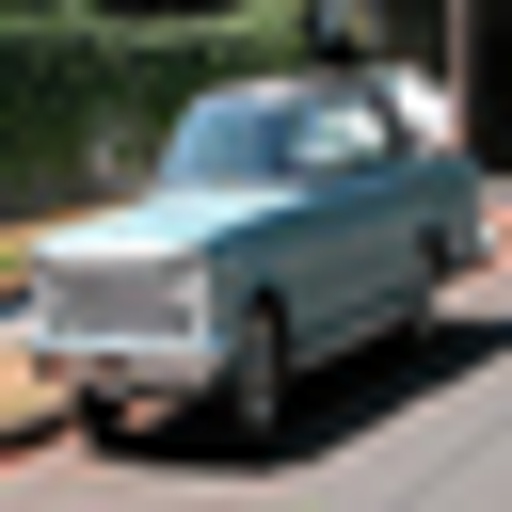

In [ ]:
test_img = trainset[32][0]
test_img = test_img.resize((512, 512))
test_img

In [ ]:
train_X = np.array([np.array(i).flatten() for i, label in trainset])
train_y = [label for i, label in trainset]

test_X = np.array([np.array(i).flatten() for i, label in testset])
test_y = [label for i, label in testset]

In [ ]:
train_X[32].shape

(3072,)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

neigh = KNeighborsClassifier(n_neighbors=16)
neigh.fit(train_X, train_y)

KNeighborsClassifier(n_neighbors=16)

In [ ]:
predict = neigh.predict(test_X[:300])

In [ ]:
accuracy_score(test_y[:300], predict)

0.32666666666666666

In [ ]:
random_pred = np.random.randint(0, 10, 300)

In [ ]:
accuracy_score(test_y[:300], random_pred)

0.08666666666666667

In [ ]:
distance, neigh = neigh.kneighbors(test_X[:300])

In [ ]:
neigh

array([[47188, 20051, 17972, ..., 47837, 22284, 49207],
       [42768, 44019, 34140, ..., 39953,  2192, 40702],
       [21298,  4469, 37674, ..., 14913, 30147,  1726],
       ...,
       [11060, 37330, 32070, ...,  4941, 23419, 48428],
       [34529, 24919, 16450, ..., 28231, 42235, 18525],
       [45801, 28834, 28594, ...,  6173, 23309,   420]])

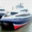

In [ ]:
testset[1][0]

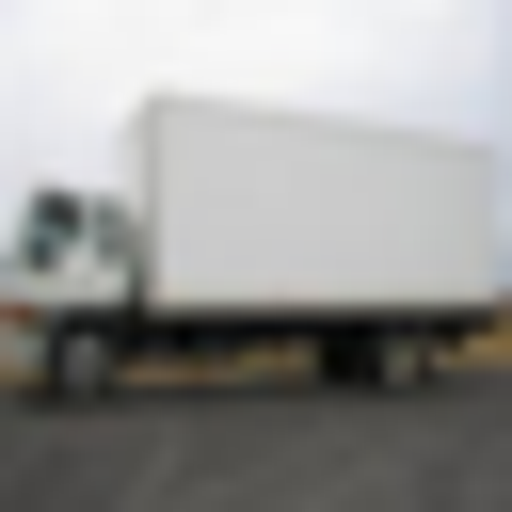

In [ ]:
pred_2 = trainset[2192][0]
pred_2 = pred_2.resize((512, 512))
pred_2

In [ ]:
classes[trainset[2192][1]]

'truck'

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

import numpy as np

import matplotlib.pyplot as plt

In [ ]:
def imshow(img):
    plt.figure(figsize=(8, 8))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class ConvNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


In [ ]:
torch_tensor = torch.rand((1, 3, 32, 32))

In [ ]:
conv1 = nn.Conv2d(3, 6, 5)
conv2 = nn.Conv2d(5, 128, 5)
conv3 = nn.Conv2d(128, 256, 5)


In [ ]:
net = ConvNet()

In [ ]:
net(torch_tensor)

tensor([[ 0.0693,  0.0308, -0.1165, -0.1210, -0.0113, -0.0437,  0.0353,  0.0982,
         -0.0758,  0.0161]], grad_fn=<AddmmBackward0>)

In [ ]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=128, shuffle=False, num_workers=2)

In [ ]:
# 1, 3, 32, 32
# 1, 16, 3, 32, 32

In [ ]:
import torch.optim as optim
from tqdm.auto import tqdm

In [ ]:
criterion = nn.CrossEntropyLoss()

net = net.cuda()

# - y_true * log(y_pred)

optimizer = optim.Adam(net.parameters(), lr=0.001)

In [ ]:
for epoch in range(5):
    running_loss = 0.0
    for i, data in tqdm(enumerate(trainloader, 0)):
        inputs, labels = data

        optimizer.zero_grad()
        outputs = net(inputs.cuda()) # (4, 10)

        loss = criterion(outputs, labels.cuda())
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 100 == 99:
            print(epoch + 1, i + 1, running_loss)
            running_loss = 0.0

0it [00:00, ?it/s]

1 100 211.57872462272644
1 200 181.36591029167175
1 300 172.25230884552002


0it [00:00, ?it/s]

2 100 159.7137347459793
2 200 154.8440865278244
2 300 154.20486509799957


0it [00:00, ?it/s]

3 100 147.70727586746216
3 200 146.20839703083038
3 300 145.0791758298874


0it [00:00, ?it/s]

4 100 141.9518609046936
4 200 138.5361361503601
4 300 138.1399086713791


0it [00:00, ?it/s]

5 100 134.49476301670074
5 200 134.74142849445343
5 300 132.06996285915375


In [ ]:
preds = []
for i, data in tqdm(enumerate(testloader, 0)):
    inputs, labels = data
    prediction = net(inputs.cuda())
    preds.append(torch.max(prediction, 1)[1].detach().cpu().numpy())
    break

0it [00:00, ?it/s]

In [ ]:
accuracy_score(labels.detach().cpu().numpy(), preds[0])

0.609375